In [1]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model import LstmForecast
from ts.plot import Plot

In [2]:
def tryModelOneSeq(trainSequences, testData):
    model = LstmForecast(
        forecastHorizon=1,
        stateSize=50,
        activation='tanh',
        numRnnLayers=3
    )

    loss = model.train(
        trainSequences=trainSequences,
        numIterations=15,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.03,
                20,
                0.96
            )
        )
    )

    Plot.plotLoss(loss)

    trainPlot = 5
    for i, idx in enumerate(list(np.random.randint(0, len(trainSequences), size=(trainPlot,)))):

        seq = trainSequences[idx]
        evalLoss, Ypred = model.evaluate(seq, returnPred=True)
        Ytrue = seq[1:]
        print(f'Training Eval Loss: {evalLoss}')

        Plot.plotPredTrue(
            Ypred,
            Ytrue,
            'Train Data'
        )

    testLoss, Ypred = model.evaluate(testData, returnPred=True)
    Ytrue = testData[1:]
    print(f'Test Eval Loss: {testLoss}')
    
    Plot.plotPredTrue(Ypred, Ytrue, 'Test Data')

In [3]:
def tryModelMultiSeq(trainSequences, testData):

    model = LstmForecast(
        forecastHorizon=1,
        stateSize=10,
        activation='tanh',
        numRnnLayers=1
    )

    loss = model.train(
        trainSequences=trainSequences,
        numIterations=15,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.08,
                40,
                0.98
            )
        )
    )

    Plot.plotLoss(loss)

    trainPlot = 5
    for i, idx in enumerate(list(np.random.randint(0, len(trainSequences), size=(trainPlot,)))):
        seq = trainSequences[idx]
        evalLoss, Ypred = model.evaluate(seq, returnPred=True)
        Ytrue = seq[1:]
        print(f'Training Eval Loss: {evalLoss}')

        Plot.plotPredTrue(
            Ypred,
            Ytrue,
            'Train Data'
        )

    testLoss, Ypred = model.evaluate(testData, returnPred=True)
    Ytrue = testData[1:]
    print(f'Test Eval Loss: {testLoss}')

    Plot.plotPredTrue(Ypred, Ytrue, 'Test Data')

In [4]:
# The data generator
dataGenerator = StandardGenerator('long_term')

# Data for single-sequence methods
n = 21500
trainN = 21000
trainData, testData = Utility.trainTestSplit(
    np.expand_dims(dataGenerator.generate(n), axis=1),
    train=trainN
)

Epoch 1/15
42/42 [==============================] - 12s 277ms/step - loss: 1.1627
Epoch 2/15
42/42 [==============================] - 12s 277ms/step - loss: 1.1009
Epoch 3/15
42/42 [==============================] - 12s 277ms/step - loss: 1.0875
Epoch 4/15
42/42 [==============================] - 12s 291ms/step - loss: 1.0725
Epoch 5/15
42/42 [==============================] - 12s 289ms/step - loss: 1.0860
Epoch 6/15
42/42 [==============================] - 12s 290ms/step - loss: 1.0639
Epoch 7/15
42/42 [==============================] - 12s 277ms/step - loss: 1.0681
Epoch 8/15
42/42 [==============================] - 12s 289ms/step - loss: 1.0518
Epoch 9/15
42/42 [==============================] - 12s 293ms/step - loss: 1.0569
Epoch 10/15
42/42 [==============================] - 12s 284ms/step - loss: 1.0508
Epoch 11/15
42/42 [==============================] - 12s 280ms/step - loss: 1.0451
Epoch 12/15
42/42 [==============================] - 12s 276ms/step - loss: 1.0468
Epoch 13/15
4

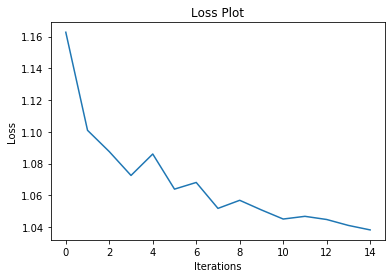

Training Eval Loss: 0.9766106605529785


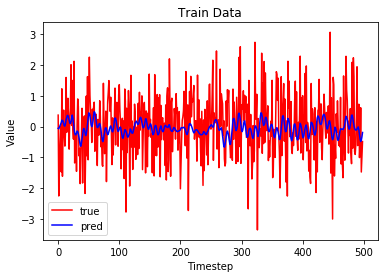

Training Eval Loss: 0.9858787059783936


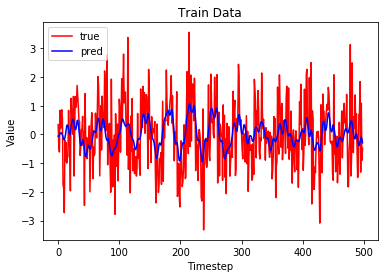

Training Eval Loss: 1.1360447406768799


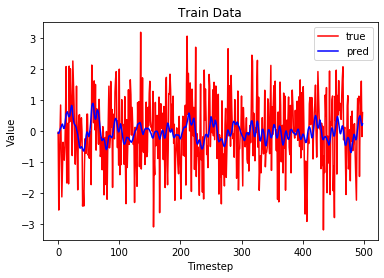

Training Eval Loss: 1.1200109720230103


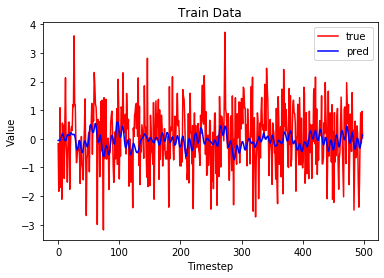

Training Eval Loss: 1.0027369260787964


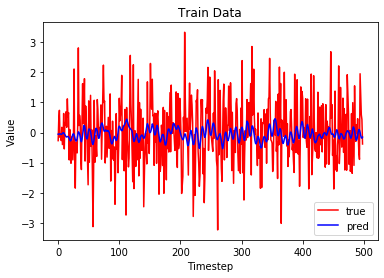

Test Eval Loss: 1.0155173540115356


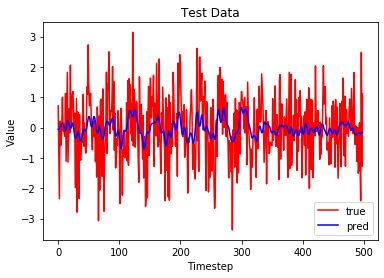

In [5]:
# Method 1 - train on mutually exclusive sequences
seqLength = 500
trainSequences = Utility.breakSeq(trainData, seqLength)
tryModelOneSeq(trainSequences, testData)

Epoch 1/15
42/42 [==============================] - 16s 383ms/step - loss: 1.2249
Epoch 2/15
42/42 [==============================] - 15s 367ms/step - loss: 1.1722
Epoch 3/15
42/42 [==============================] - 17s 394ms/step - loss: 1.1869
Epoch 4/15
42/42 [==============================] - 16s 376ms/step - loss: 1.1817
Epoch 5/15
42/42 [==============================] - 17s 396ms/step - loss: 1.1714
Epoch 6/15
42/42 [==============================] - 17s 399ms/step - loss: 1.1650
Epoch 7/15
42/42 [==============================] - 15s 360ms/step - loss: 1.1642
Epoch 8/15
42/42 [==============================] - 14s 339ms/step - loss: 1.1608
Epoch 9/15
42/42 [==============================] - 15s 363ms/step - loss: 1.1545
Epoch 10/15
42/42 [==============================] - 15s 360ms/step - loss: 1.1378
Epoch 11/15
42/42 [==============================] - 15s 348ms/step - loss: 1.1477
Epoch 12/15
42/42 [==============================] - 15s 362ms/step - loss: 1.1176
Epoch 13/15
4

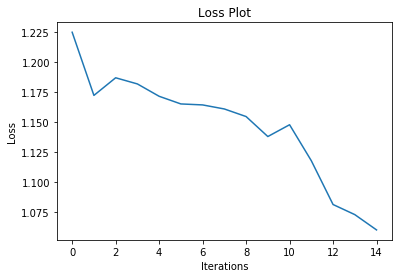

Training Eval Loss: 0.9622730016708374


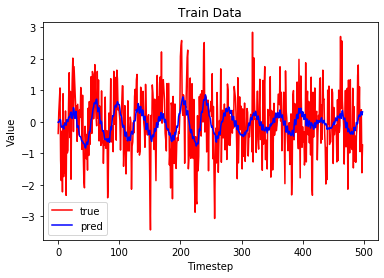

Training Eval Loss: 1.1238547563552856


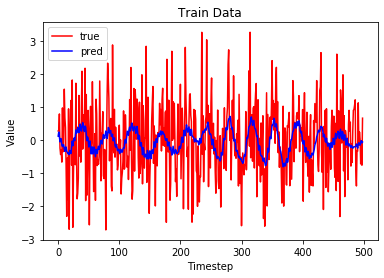

Training Eval Loss: 0.9930883049964905


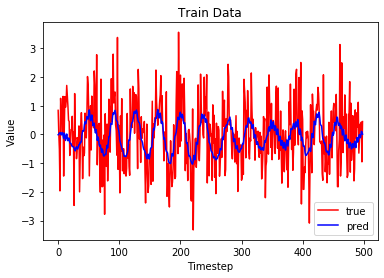

Training Eval Loss: 1.1238547563552856


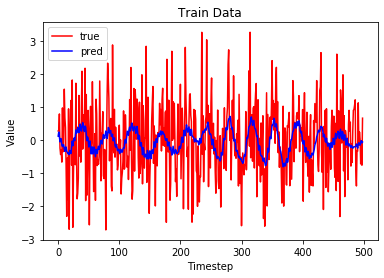

Training Eval Loss: 1.1238547563552856


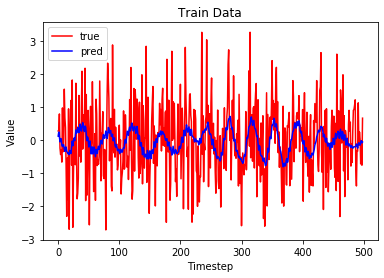

Test Eval Loss: 0.9964852929115295


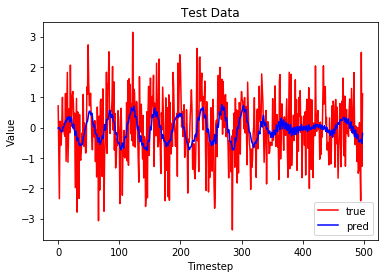

In [6]:
# Method 2 - train on randomly sampled contiguous sequences
seqLength = 500
numSeq = 42
trainSequences = [
    trainData[startIdx: startIdx + seqLength]
    for startIdx in list(np.random.randint(
        0,
        trainN - seqLength,
        size=(numSeq,)
    ))
]
tryModelOneSeq(trainSequences, testData)

Epoch 1/15
1/1 [==============================] - 0s 918us/step - loss: 1.1780
Epoch 2/15
1/1 [==============================] - 0s 878us/step - loss: 1.3212
Epoch 3/15
1/1 [==============================] - 0s 766us/step - loss: 1.3298
Epoch 4/15
1/1 [==============================] - 0s 812us/step - loss: 1.2973
Epoch 5/15
1/1 [==============================] - 0s 994us/step - loss: 1.5407
Epoch 6/15
1/1 [==============================] - 0s 1ms/step - loss: 1.1730
Epoch 7/15
1/1 [==============================] - 0s 784us/step - loss: 1.1730
Epoch 8/15
1/1 [==============================] - 0s 846us/step - loss: 1.2118
Epoch 9/15
1/1 [==============================] - 0s 787us/step - loss: 1.1710
Epoch 10/15
1/1 [==============================] - 0s 1ms/step - loss: 1.1177
Epoch 11/15
1/1 [==============================] - 0s 916us/step - loss: 1.1024
Epoch 12/15
1/1 [==============================] - 0s 785us/step - loss: 1.5320
Epoch 13/15
1/1 [==============================] - 0s

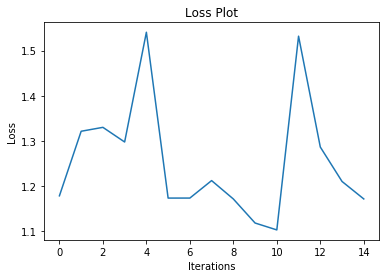

Training Eval Loss: 1.1663180589675903


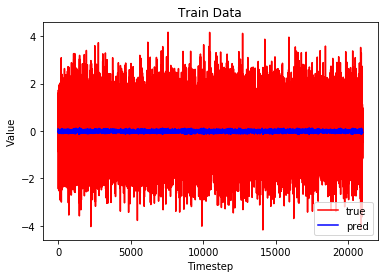

Training Eval Loss: 1.1663180589675903


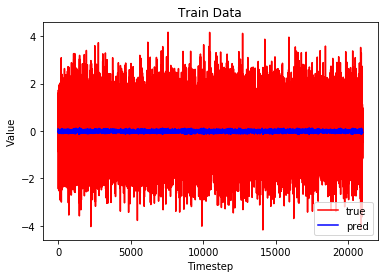

Training Eval Loss: 1.1663180589675903


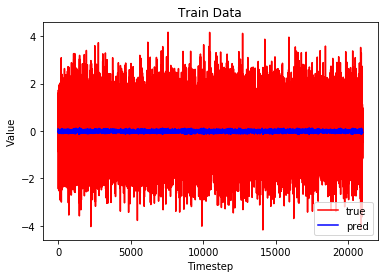

Training Eval Loss: 1.1663180589675903


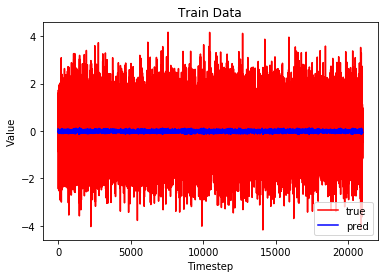

Training Eval Loss: 1.1663180589675903


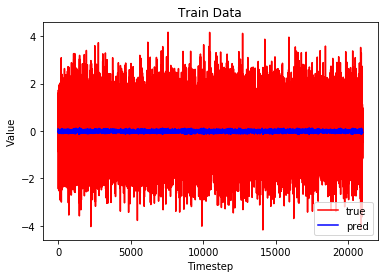

Test Eval Loss: 1.1415586471557617


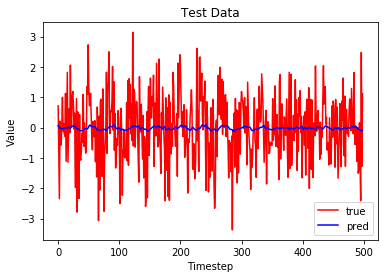

In [8]:
# Method 3 - train on the single long sequence
trainSequences = [trainData]
tryModelOneSeq(trainSequences, testData)

Epoch 1/15
42/42 [==============================] - 5s 121ms/step - loss: 1.1744
Epoch 2/15
42/42 [==============================] - 5s 116ms/step - loss: 1.1673
Epoch 3/15
42/42 [==============================] - 5s 122ms/step - loss: 1.1651
Epoch 4/15
42/42 [==============================] - 5s 122ms/step - loss: 1.1426
Epoch 5/15
42/42 [==============================] - 6s 137ms/step - loss: 1.1330
Epoch 6/15
42/42 [==============================] - 5s 118ms/step - loss: 1.1220
Epoch 7/15
42/42 [==============================] - 5s 120ms/step - loss: 1.1065
Epoch 8/15
42/42 [==============================] - 5s 120ms/step - loss: 1.1351
Epoch 9/15
42/42 [==============================] - 5s 112ms/step - loss: 1.1120
Epoch 10/15
42/42 [==============================] - 5s 128ms/step - loss: 1.1134
Epoch 11/15
42/42 [==============================] - 5s 122ms/step - loss: 1.1092
Epoch 12/15
42/42 [==============================] - 5s 114ms/step - loss: 1.1037
Epoch 13/15
42/42 [======

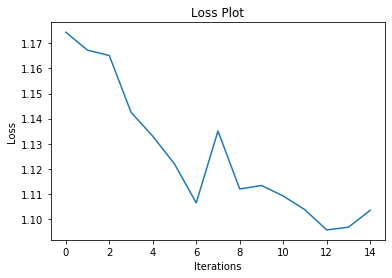

Training Eval Loss: 1.0100302696228027


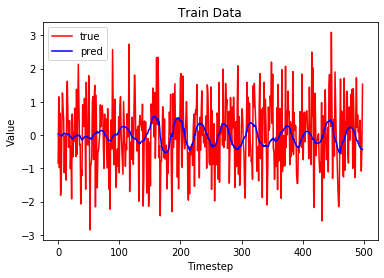

Training Eval Loss: 1.023154377937317


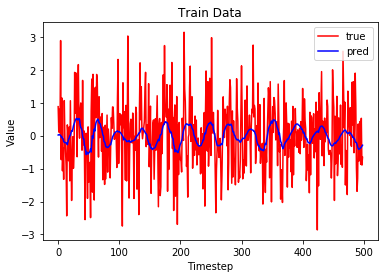

Training Eval Loss: 1.0344595909118652


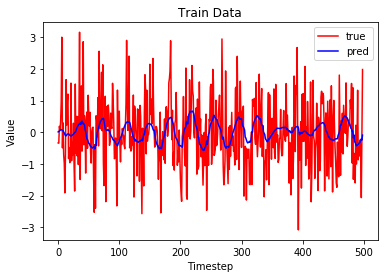

Training Eval Loss: 1.0365848541259766


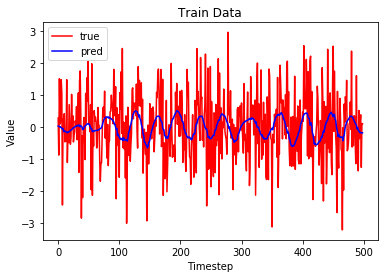

Training Eval Loss: 1.0365848541259766


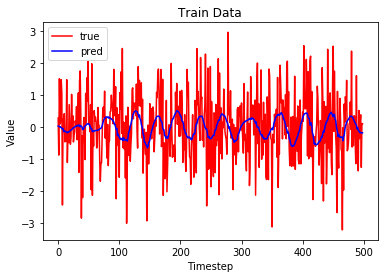

Test Eval Loss: 1.1563513278961182


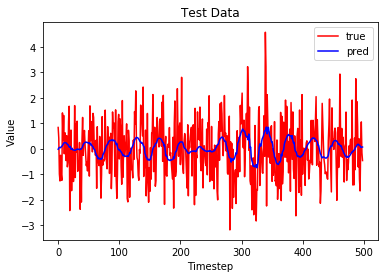

In [11]:
# Multiple Independent Train Sequences
seqLength = 500
numSeq = 42
trainSequences = Utility.generateMultipleSequence(
    dataGenerator=dataGenerator,
    numSequences=numSeq,
    minSequenceLength=seqLength,
    maxSequenceLength=seqLength
)

trainSequences = list(map(
    lambda targetSeries: np.expand_dims(targetSeries, axis=1),
    trainSequences
))

testData = np.expand_dims(dataGenerator.generate(seqLength), axis=1)
tryModelMultiSeq(trainSequences, testData)